<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:

<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.

<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


In [1]:
!pip install yfinance
#!pip install pandas

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=a5675ea46d98cf193f8bbb88ddb4d59dee873fbca7cf1829def08f39fd2f37fb
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\ec\cc\c1\32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=f47d1ff24752b1d5709cafc75225b5cb54330fe14928a12051b09d883777166d
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [2]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [3]:
apple = yf.Ticker("AAPL")

To access functions and variables to extract the type of data we need. We can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.


### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [4]:
apple_info=apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

We can get the <code>'country'</code> using the key country


In [5]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [6]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [7]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100751,0.101189,0.100751,0.100751,469033600,0.0,0.0
1980-12-15,0.095933,0.095933,0.095495,0.095495,175884800,0.0,0.0
1980-12-16,0.088923,0.088923,0.088485,0.088485,105728000,0.0,0.0
1980-12-17,0.090676,0.091114,0.090676,0.090676,86441600,0.0,0.0
1980-12-18,0.093304,0.093742,0.093304,0.093304,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [8]:
apple_share_price_data.reset_index(inplace=True)


We can plot the `Open` price against the `Date`:


<AxesSubplot:xlabel='Date'>

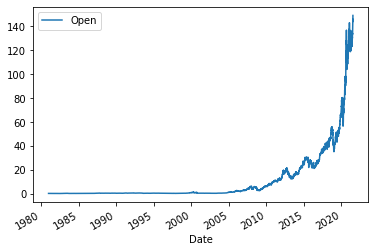

In [9]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history\` function.


In [10]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-05-08    0.205000
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
Name: Dividends, Length: 71, dtype: float64

We can plot the dividends overtime:


<AxesSubplot:xlabel='Date'>

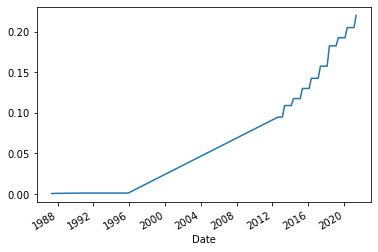

In [11]:
apple.dividends.plot()

Using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [13]:
amd=yf.Ticker('AMD')

In [14]:
amd.info['country']

'United States'

In [15]:
amd.info['sector']

'Technology'

To Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


In [22]:
amd.history(period='Max')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.000000,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.000000,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.000000,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.000000,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.000000,3.020833,2.906250,2.916667,130800,0,0.0
...,...,...,...,...,...,...,...
2021-07-09,90.040001,91.260002,88.529999,90.900002,35256400,0,0.0
2021-07-12,91.220001,91.900002,89.650002,90.809998,28526600,0,0.0
2021-07-13,90.480003,91.410004,89.830002,90.260002,30340800,0,0.0


<AxesSubplot:xlabel='Date'>

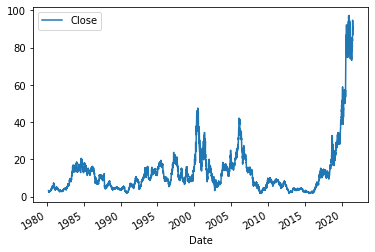

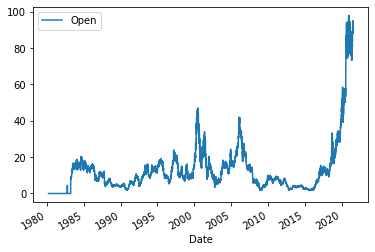

In [29]:
amd_shares=amd.history(period='Max')
amd_shares.reset_index(inplace=True)
amd_shares.plot(x='Date', y='Close')
amd_shares.plot(x='Date', y='Open')